<center><h1>Técnicas de Inteligencia Artificial</header1></center>

Presentado por: Génesis Belén Heredia  <br>
Fecha: 17/07/2022

# Importación de librerias necesarias

In [58]:
#Para esta actividad se importarán las siguientes librerías:
#Se implementan las librerias para obtener los datos

#Se realiza la importación de la libreria pandas
import pandas as pd
#Se realiza la importación de la libreria numpy
import numpy as np

#Se realiza la importación de la libreria sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Se realiza la importación de la libreria statsmodels
import statsmodels.api as smi

#Se realiza la importación de la libreria necesaria para la regresión lineal
from sklearn.linear_model import LinearRegression 

#Se realiza la importación de la libreria que permite realizar la grafica
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Cargar el Dataset

In [17]:
#Código para cargar Dataset
#Se cargan los datos del Dataset mediante la libreria pandas
FishLinear = pd.read_csv("Fish.csv" )

In [20]:
#Se visualizan 10 registros
FishLinear.head(15)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación


LabelEncoder

In [22]:
#Transformación de las caracteristicas
encoder = LabelEncoder()

In [24]:
#Transformación de la característica "Species"
FishLinear["Species"] = encoder.fit_transform(FishLinear["Species"])

In [25]:
#Visualización de los datos transformados
FishLinear.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [26]:
#Descripción del dataset
FishLinear.describe()

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,2.264151,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,1.704249,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,1.000000,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,2.000000,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,3.500000,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,6.000000,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## Descripción de la fuente del Dataset

In [27]:
#Código que responde a la descripción anterior
FishLinear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    int32  
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), int32(1)
memory usage: 8.2 KB


***Descripción***

Mediante el uso de la función info podemos deducir que existen 159 registros los cuales representan diferentes caracteristicas de los peces con mejores pesos. El dataset cuenta con 7 campos donde se puede tomar como variable objetivo ***(Weight)*** y como variables de entrada:

***Variables independientes o variables de entrada X***

***Species:*** Especie a la que pertenecen los peces - Variable Categórica. 

***Length1:*** Longitud vertical en cm del pescado - Variable Continua.

***Length2:*** Longitud diagonal en cm del pescado - Variable Continua.

***Length3:*** Longitud de la cruz en cm del pescado - Variable Continua.

***Height:***  Altura del pescado (cm) -  Variable Continua.

***Width:*** Anchura diagonal del pescado (cm) - Variable Continua.




***Variable dependiente o variable objetivo Y***

***Weight:*** Peso de los pescados (gr) - Variable Continua.


## Explique el problema a resolver. 

Se realizará un modelo de predicción para poder realizar una estimación del mejor peso de los peces, para ello se hará uso de un dataset denominado Fish el mismo que cuenta con 159 registros para cada características. La variable objetivo para este modelo es ***Weight*** y las 6 variables independientes o de entrada que permitirán realizar la regresión lineal.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


***Número de instancias en total***


In [67]:
#Conteo de los registros del dataset
FishLinear.count()

Species    159
Weight     159
Length1    159
Length2    159
Length3    159
Height     159
Width      159
dtype: int64

***Número de atributos de entrada, su significado y tipo***



***Species:*** Especie a la que pertenecen los peces - Variable Categórica. 

***Length1:*** Longitud vertical en cm del pescado - Variable Continua.

***Length2:*** Longitud diagonal en cm del pescado - Variable Continua.

***Length3:*** Longitud de la cruz en cm del pescado - Variable Continua.

***Height:***  Altura del pescado (cm) -  Variable Continua.

***Width:*** Anchura diagonal del pescado (cm) - Variable Continua.

***Estadísticas de la variable objetivo***

<AxesSubplot:>

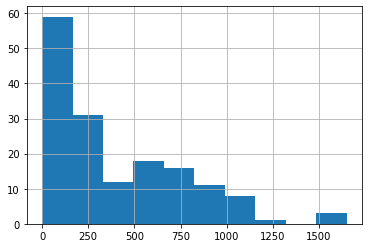

In [30]:
#Trazo de linea habilitado
%matplotlib inline
#Creación de gráfico en base a la variable objetivo
FishLinear['Weight'].hist()

Mediante la gráfica implementada podemos deducir que, la variable objetivo (Weight) es efectiva y esto se debe a la curva que forma su gráfica. Siendo posible la aplicación de la regresión lineal para este modelo.

#### Visualización la distribución de todas las variables de entrada categóricas mediante diagramas de barras

In [31]:
# Encontramos los valores unicos para identificar aquellos que son categoricos y los que son continuos
FishLinear.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

Mediante la implementación de la función unique se pudo determinar 1 variable categórica. Esto se debe a que cuentan con un valor mínimo de registros y su valor es menor a 20. Por ello, se obtiene como resultado la variable **"Species"** con un total de 7 registros únicos.

In [36]:
def PlotBarCharts(inpData, colsToPlot):   
    #Trazo de linea habilitado 
    %matplotlib inline
    
    #Generar multiples subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    #Agregar la leyenda del grafico
    fig.suptitle('Bar charts of: '+ str(colsToPlot))
    
    #Generar escala de los graficos para cada subplot
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

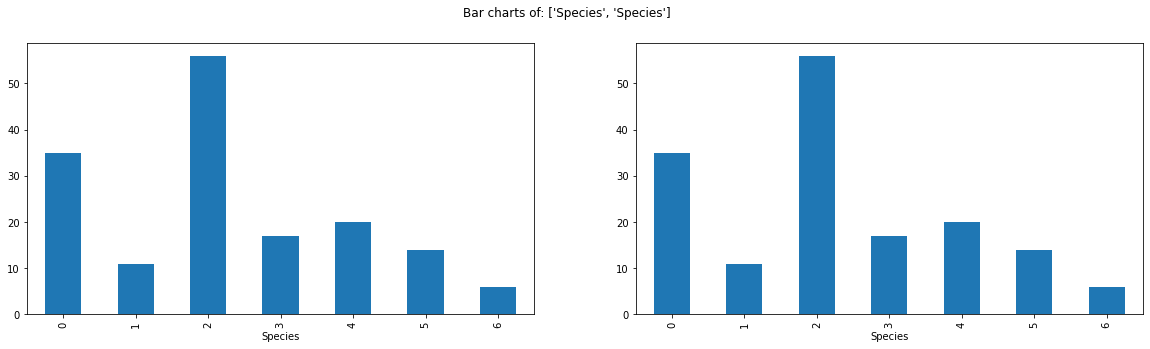

In [37]:
#Llamando a la función PlotBarCharts
PlotBarCharts(inpData=FishLinear, colsToPlot=['Species', 'Species'])

Mediante las gráficas obtenidas podemos deducir que al utilizar este modelo no exisitirá ningun inconveniento debido a que es util y fácil de realizar la regresión.

#### Visualizar la distribución de todas las variables continuas usando histogramas

array([[<AxesSubplot:title={'center':'Length1'}>,
        <AxesSubplot:title={'center':'Length2'}>],
       [<AxesSubplot:title={'center':'Length3'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Width'}>, <AxesSubplot:>]],
      dtype=object)

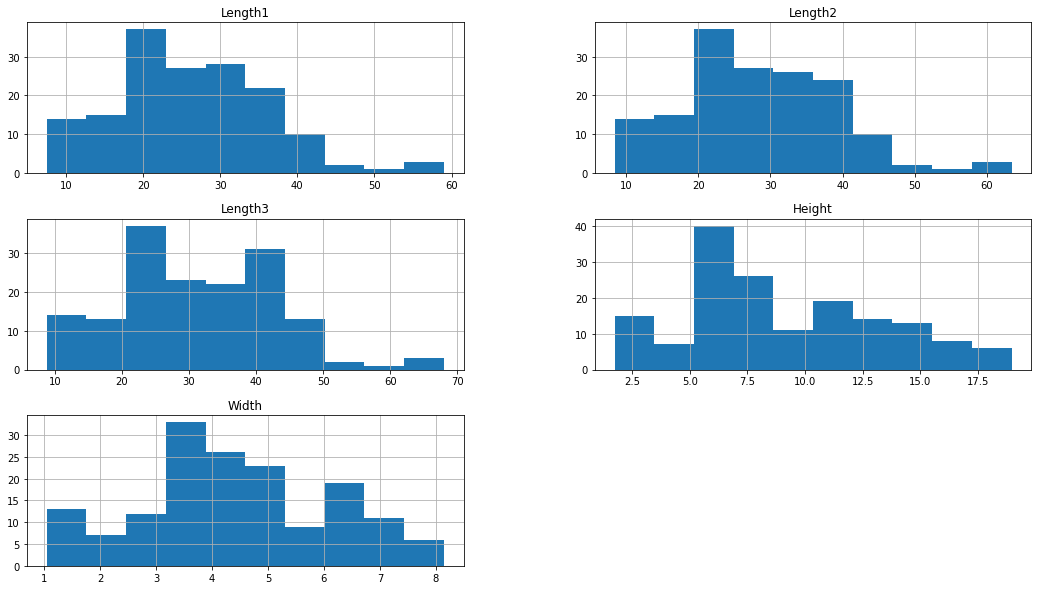

In [40]:
#Histograma de variables continuas
FishLinear.hist(['Length1','Length2', 'Length3','Height','Width'], figsize=(18,10))

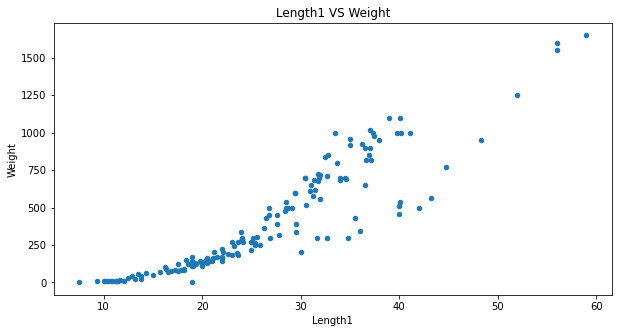

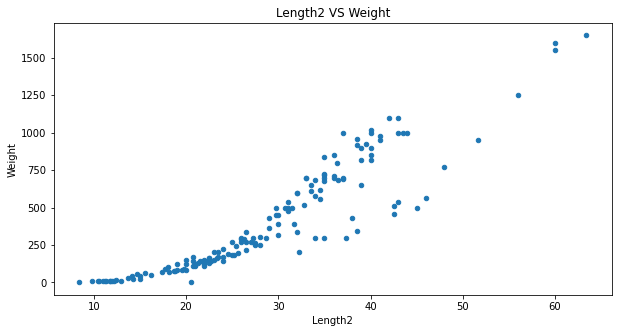

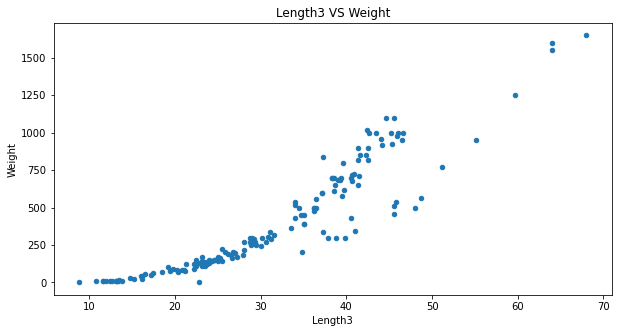

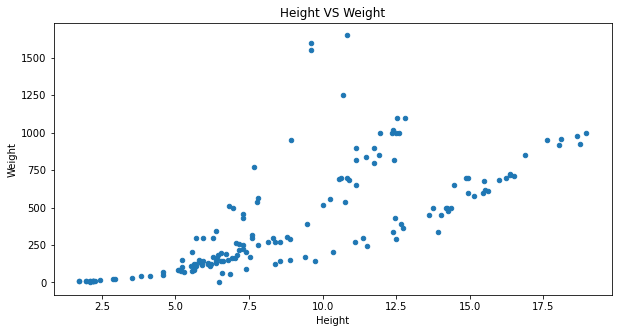

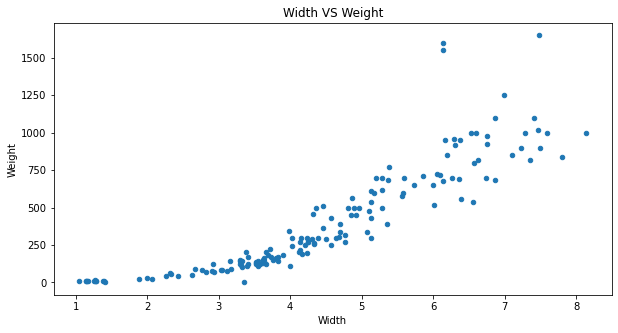

In [41]:
#Variables continuas
ContinuousCols=['Length1','Length2', 'Length3','Height','Width']

#Plotting chart para cada variable de entrada vs varible objetivo
for predictor in ContinuousCols:
    # Gráfica de relación entre la variable dependiente y las variables continuas
    FishLinear.plot.scatter(x=predictor, y='Weight', figsize=(10,5), title=predictor+" VS "+ 'Weight')

#### Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación


In [46]:
#Transformación de las caracteristicas
# Variable objetivo (y) - variables de entrada (x)
VariablesEntrada=['Species','Length1','Length2', 'Length3','Height','Width']
VariableObjetivo=['Weight']
X=FishLinear[VariablesEntrada]
y=FishLinear[VariableObjetivo]

In [47]:
#Estandarización del dataset
from sklearn.preprocessing import StandardScaler
VariablesEntradaScaler=StandardScaler()
VariableObjetivoScaler=StandardScaler()

In [48]:
#Almacenamiento del objeto de ajuste para referencia posterior
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [49]:
#Generación de los valores estandarizados de X - Y
X=VariablesEntradaFit.transform(X)
y=VariableObjetivoFit.transform(y)

## División del dataset en datos de entrenamiento y datos de test 

In [50]:
#Divida los datos en un conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
#Comprobación rápida del tamaño de los conjuntos de datos de entrenamiento y prueba
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(111, 6)
(111, 1)
(48, 6)
(48, 1)


## Regresión Lineal

In [52]:
#Código del modelo
#Adaptar el modelo
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
#Entrenamiento
y_pred=lr.predict(X_test)
print(y_pred)

[[-0.89182692]
 [-1.46718663]
 [ 0.02496738]
 [ 0.06166762]
 [-0.6827645 ]
 [ 1.20759356]
 [-1.67182279]
 [-0.31056087]
 [-0.41361483]
 [ 2.18123956]
 [ 0.48490297]
 [ 1.42096081]
 [ 0.4887746 ]
 [-0.67837451]
 [ 0.77703218]
 [ 1.22356595]
 [ 1.48849083]
 [-0.21012855]
 [-0.36724375]
 [ 0.49313467]
 [-1.56791172]
 [ 0.65285282]
 [ 0.32904568]
 [ 0.22181248]
 [ 1.24289569]
 [ 1.45665787]
 [-0.52428564]
 [ 0.0589428 ]
 [-1.72857386]
 [-1.5643424 ]
 [ 0.85237968]
 [-1.11290887]
 [-1.18736434]
 [ 1.26370645]
 [-0.18082918]
 [-0.64834302]
 [-0.52852802]
 [-0.72585621]
 [-0.48692568]
 [ 1.16463719]
 [ 0.76138299]
 [ 1.05181201]
 [-1.6647603 ]
 [-0.7347164 ]
 [-0.67865419]
 [-0.93877229]
 [-0.7778203 ]
 [ 0.70339889]]


In [55]:
#Test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8854038212498819

In [62]:
# Imprimir algunos valores de muestra de predicción
# Asignamos las variables dependientes de x_test
TestingDataResults=pd.DataFrame(data=X_test, columns=VariablesEntrada)
# Asignamos a la variable objetivo los valores de y_test
TestingDataResults[VariableObjetivo]=y_test
# Creamos una matriz con los resultados de la predicción
TestingDataResults[('Predicted'+'Weight')]=np.round(y_pred)

# Impresión de valores muestra de la predicción
print(TestingDataResults[['Weight','Predicted' + 'Weight']].head())

     Weight  PredictedWeight
0 -0.897648             -1.0
1 -1.078676             -1.0
2 -0.555768              0.0
3 -0.359608              0.0
4 -0.695883             -1.0


In [63]:
# Cálculo del error para cada fila
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Weight']-TestingDataResults['PredictedWeight']))/TestingDataResults['Weight'])

# Obtenemos la media MAPE de los datos obtenidos de la prueba
MAPE=np.mean(TestingDataResults['APE'])
# Obtenemos la mediana de MAPE de los datos obtenidos de la prueba
MedianMAPE=np.median(TestingDataResults['APE'])

# Calculamos la precisión
Accuracy =100 - MAPE
# Calculamos la mediana de precisión
MedianAccuracy=100- MedianMAPE
# Imprimimos el promedio de precisión de los datos de prueba
print('Mean Accuracy de test data:', Accuracy)
# Imprimimos la mediana de precisión de los datos de prueba
print('Median Accuracy de test data:', MedianAccuracy)

Mean Accuracy de test data: 103.70341883630138
Median Accuracy de test data: 110.04503330966922


In [64]:
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    
    # Retorno del error porcentual absoluto medio
    return(100-MAPE)


In [65]:
# Importamos make_scorer de la libreria sklearn.metrics
from sklearn.metrics import make_scorer
# Cálculo MAPE de puntuación personalizada
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importación de la función de validación cruzada de sklearn
from sklearn.model_selection import cross_val_score

# Ejecutar validación cruzada de 10 veces en un algoritmo dado
# Pasar datos completos X e y porque el K-fold dividirá los datos y automáticamente elegirá entrenar/probar
Accuracy_Values=cross_val_score(lr, X , y, cv=10, scoring=custom_Scoring)
# Imprimimos los valores de precisión para la validación cruzada de 10 veces
print('\nValores de precisión para la validación cruzada de 10 veces:\n',Accuracy_Values)
# Imprimimos los valores p recisión media final del modelo
print('\nPrecisión media final del modelo:', round(Accuracy_Values.mean(),2))


Valores de precisión para la validación cruzada de 10 veces:
 [160.83074216  72.65399267 117.00386545 373.13768728 138.76126313
 109.93815236 156.42214049  65.21933471  25.73063727 171.13161671]

Precisión media final del modelo: 139.08


## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 

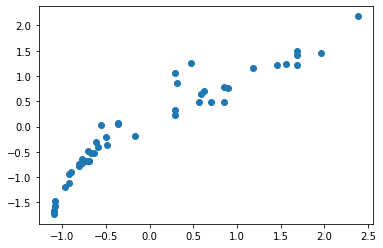

In [66]:
#Construcción de la grafica para visualizar el resultado
plt.scatter(y_test,y_pred)